Assignment 1 – Simple Linear Regression
Goal: Understand the basics of regression by creating your own dataset.

Steps:
1.Formulate your own equation in the form:
y=mx+c 

Example:  y=2x+3 

2.Generate X values (at least 100 numbers between your chosen range).

3.Generate Y values using your equation.

4.Add small random noise to Y to make it realistic.

5.Split data into train and test splits

6.Fit a Simple Linear Regression model.

7.Print learned coefficient and intercept.

8.Split the data into train and test sets (80%-20%).

9.Evaluate both train and test using MAE, MSE, R² score.

Write your notes about model performance and whether the model suffers from overfitting or underfitting.

10.Visualize the points and the fitted line

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
import os
import datetime as dt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler 
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
X = np.random.randint(low= 10, high= 100, size= 100)
y = 2 * X + 6
noise = np.random.normal(loc= 0, scale= 0.1, size = len(y))
y = y + noise

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [4]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [5]:
coefficient = linreg.fit(X_train, y_train).coef_
intercept = linreg.fit(X_train, y_train).intercept_
print(f"Model Cofficient Value = {round(coefficient[0], 3)}, and Model Intercept Value = {round(intercept, 3)}")

Model Cofficient Value = 2.0, and Model Intercept Value = 5.977


In [6]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(f"Model Mean Aboslute Error Value on Train Data = {round(MAE_train, 3)}, and on Test Data = {round(MAE_test, 3)}")

Model Mean Aboslute Error Value on Train Data = 0.079, and on Test Data = 0.073


In [7]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f"Model Mean Squared Error Value on Train Data = {round(MSE_train, 3)}, and on Test Data = {round(MSE_test, 3)}")

Model Mean Squared Error Value on Train Data = 0.009, and on Test Data = 0.009


In [8]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(f"Model R Squared Value on Train Data = {round(R2_train, 3)}, and on Test Data = {round(R2_test, 3)}")

Model R Squared Value on Train Data = 1.0, and on Test Data = 1.0


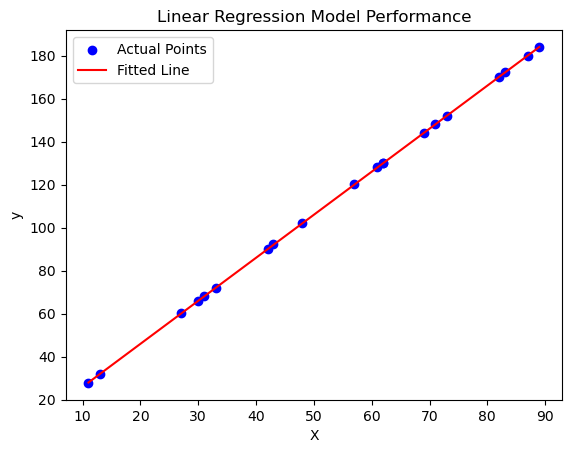

In [9]:
plt.scatter(X_test, y_test, color= "blue", label= "Actual Points")

X_test_sorted = np.sort(X_test, axis= 0)
y_pred_line = linreg.predict(X_test_sorted)

plt.plot(X_test_sorted, y_pred_line, color= "red", label= "Fitted Line")
plt.title("Linear Regression Model Performance")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show();

## The simple linear regression model has both very low mean squared error, and mean absolute error on both training and test sets it also have an R Squared value of 1.0 on both train and test sets which is perfectly describe the variancce in the dependent variable "y" caused by the independent variables, and as it's clear from the visualization the model perfectly predict the test values so the model doesn't suffer from neither overfitting nor underfitting problems.

Assignment 2 – Multiple Linear Regression

Goal: See how multiple features affect predictions.

Steps:
1.Formulate your own equation:  
Example: y=a1x1+a2x2+c

2.Generate x1 and x2 values (at least 100 numbers each).

3.Generate Y values with noise.

4.Split data into train and test splits

5.Fit a Multiple Linear Regression model.

6.Compare coefficients and intercept to your original equation.

7.Evaluate both train and test using MAE, MSE, R² score.

Write your notes about model performance and whether the model suffers from overfitting or underfitting.

In [10]:
X1 = np.random.randint(low= 10, high= 50, size= 100)
X2 = np.random.randint(low= 60, high= 100, size= 100)
y = 3 * X1 + 6 * X2 + 9
noise = np.random.normal(loc= 0, scale= 0.1, size= len(y))
y = y + noise

In [11]:
data = pd.DataFrame({"X1": X1, "X2": X2, "y": y})
data.head()

,X1,X2,y
0,34,76,567.193354
1,32,99,699.041387
2,40,92,681.056777
3,39,68,534.014818
4,44,98,729.117244


In [12]:
X = data[["X1", "X2"]]
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [13]:
multireg = LinearRegression()
multireg.fit(X_train, y_train)
y_pred_train = multireg.predict(X_train)
y_pred_test = multireg.predict(X_test)

In [14]:
coefficient1 = multireg.fit(X_train, y_train).coef_[0]
coefficient2 = multireg.fit(X_train, y_train).coef_[1]
intercept = multireg.fit(X_train, y_train).intercept_
print(f"Model First Cofficient Value = {round(coefficient1, 3)}, and Second Cofficient Value = {round(coefficient2, 3)}, and Model Intercept Value = {round(intercept, 3)}")

Model First Cofficient Value = 3.001, and Second Cofficient Value = 6.0, and Model Intercept Value = 8.955


In [15]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(f"Model Mean Aboslute Error Value on Train Data = {round(MAE_train, 3)}, and on Test Data = {round(MAE_test, 3)}")

Model Mean Aboslute Error Value on Train Data = 0.084, and on Test Data = 0.082


In [16]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f"Model Mean Squared Error Value on Train Data = {round(MSE_train, 3)}, and on Test Data = {round(MSE_test, 3)}")

Model Mean Squared Error Value on Train Data = 0.011, and on Test Data = 0.011


In [17]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(f"Model R Squared Value on Train Data = {round(R2_train, 3)}, and on Test Data = {round(R2_test, 3)}")

Model R Squared Value on Train Data = 1.0, and on Test Data = 1.0


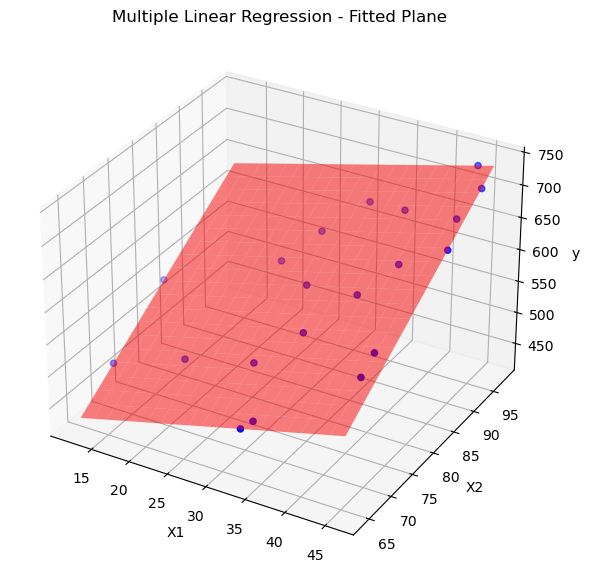

In [18]:
fig = plt.figure(figsize= (10, 7))
ax = fig.add_subplot(111, projection= "3d")

ax.scatter(X_test["X1"], X_test["X2"], y_test, color= "blue")

x1_range = np.linspace(X_test["X1"].min(), X_test["X1"].max(), 20)
x2_range = np.linspace(X_test["X2"].min(), X_test["X2"].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

y_grid = multireg.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
y_grid = y_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_grid, color= "red", alpha= 0.5)
plt.title("Multiple Linear Regression - Fitted Plane")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show();

### True coefficients are: 3, 6, and 9
### Model coefficients are: 3.001, 6.0, and 8.955 
## That means the model have captured the coefficients very well and the small errors are due to the noise that we have added

## The multiple linear regression model has both very low mean squared error, and mean absolute error on both training and test sets it also have an R Squared value of 1.0 on both train and test sets which is perfectly describe the variancce in the dependent variable "y" caused by the independent variables, and as it's clear from the visualization the model perfectly predict the test values so the model doesn't suffer from neither overfitting nor underfitting problems.

Assignment 3 – Polynomial Regression

Goal: Model non-linear relationships.

Steps:

1.Formulate your own equation:  y=ax2+bx+c

2.Generate X values and Y values with noise.

3.Use PolynomialFeatures to transform X.

4.Split the data into train and test sets (80%-20%).

5.Fit a Linear Regression model on transformed features.

6.Evaluate both train and test using MAE, MSE, R² score.

Write your notes about model performance and whether the model suffers from overfitting or underfitting.

In [19]:
X = np.random.randint(low= 5, high= 20, size= 100)
y = 2 * X**2 + 5 * X + 7
noise = np.random.normal(loc= 0, scale= 0.1, size= len(y))
y = y + noise

In [20]:
poly = PolynomialFeatures(degree= 2, include_bias= False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.2, random_state= 42)

In [22]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [23]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(f"Model Mean Aboslute Error Value on Train Data = {MAE_train}, and on Test Data = {MAE_test}")

Model Mean Aboslute Error Value on Train Data = 0.07395966280700836, and on Test Data = 0.12207903523774136


In [24]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f"Model Mean Squared Error Value on Train Data = {MSE_train}, and on Test Data = {MSE_test}")

Model Mean Squared Error Value on Train Data = 0.008177210182157854, and on Test Data = 0.02244188181310088


In [25]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(f"Model R Squared Value on Train Data = {R2_train}, and on Test Data = {R2_test}")

Model R Squared Value on Train Data = 0.9999998487936206, and on Test Data = 0.9999995528549782


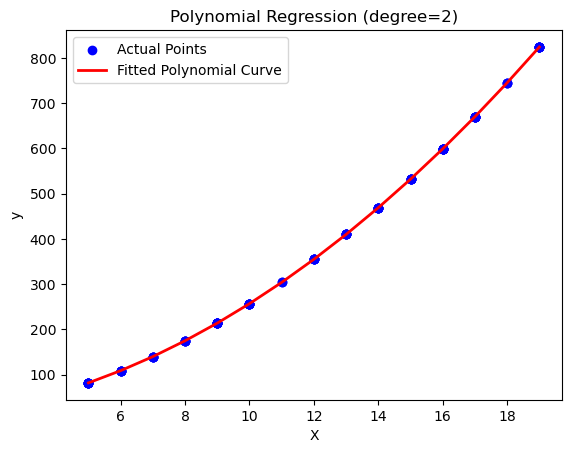

In [26]:
plt.scatter(X, y, color= "blue", label= "Actual Points")

X_sorted = np.sort(X, axis= 0)
X_sorted_poly = poly.fit_transform(X_sorted.reshape(-1, 1))
y_pred_line = linreg.predict(X_sorted_poly)

plt.plot(X_sorted, y_pred_line, color='red', linewidth=2, label='Fitted Polynomial Curve')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (degree=2)")
plt.legend()
plt.show();


## The polynomial regression model has both very low mean squared error, and mean absolute error on both training and test sets it also have an R Squared value of approximatly 1.0 on both train and test sets which is perfectly describe the variancce in the dependent variable "y" caused by the independent variables, and as it's clear from the visualization the model perfectly predict the test values so the model doesn't suffer from neither overfitting nor underfitting problems.

# Machine Learning Project Phase

In [27]:
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lenovo\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [28]:
os.listdir(path)

['airlines_flights_data.csv']

In [29]:
full_path = os.path.join(path,os.listdir(path)[0])

In [30]:
df = pd.read_csv(full_path)
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.drop(columns= "index", inplace= True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [33]:
df.describe(include= ["int64", "float64"])

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [34]:
df.describe(include= ["object"])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [35]:
for col in df.select_dtypes("object"):
    print(f"Unique values for column {col}, are:\n{df[col].unique()}.\n")

Unique values for column airline, are:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'].

Unique values for column flight, are:
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'].

Unique values for column source_city, are:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'].

Unique values for column departure_time, are:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'].

Unique values for column stops, are:
['zero' 'one' 'two_or_more'].

Unique values for column arrival_time, are:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'].

Unique values for column destination_city, are:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'].

Unique values for column class, are:
['Economy' 'Business'].



In [36]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [37]:
df.duplicated().sum()

0

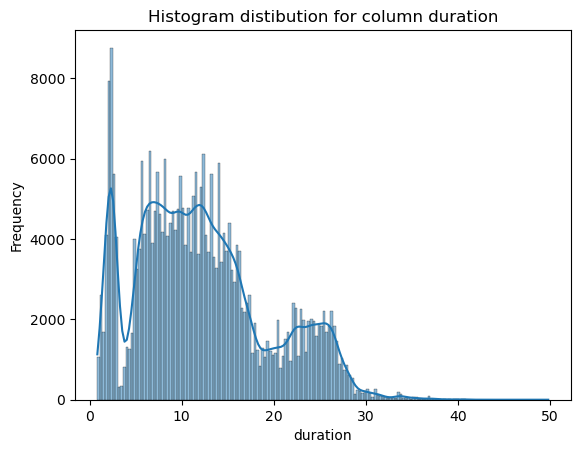

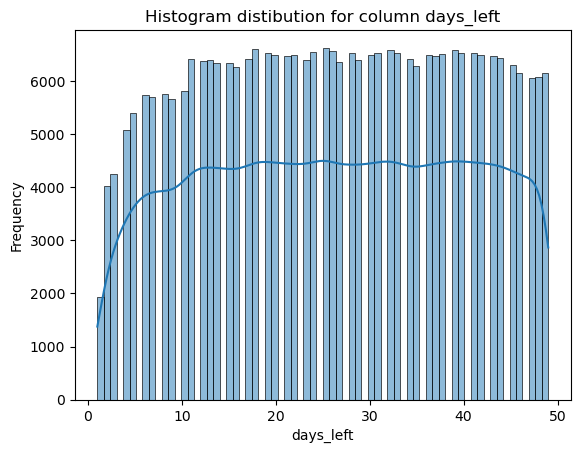

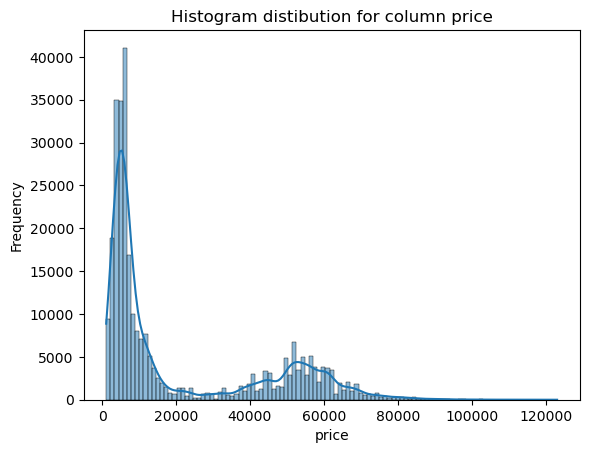

In [38]:
for col in ["duration", "days_left", "price"]:
    sns.histplot(data= df, x= df[col], kde= True)
    plt.title(f"Histogram distibution for column {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show();

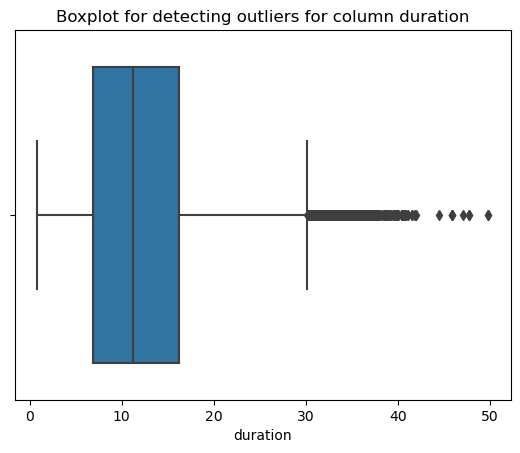

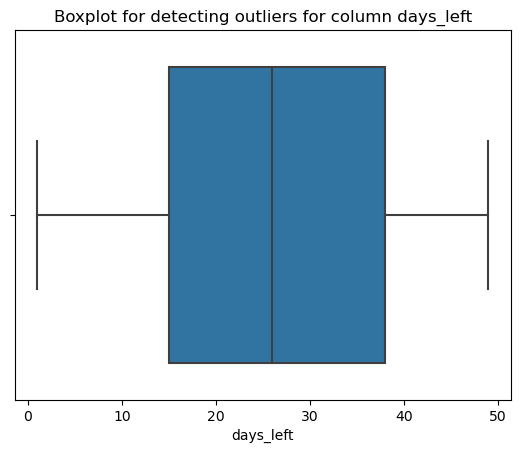

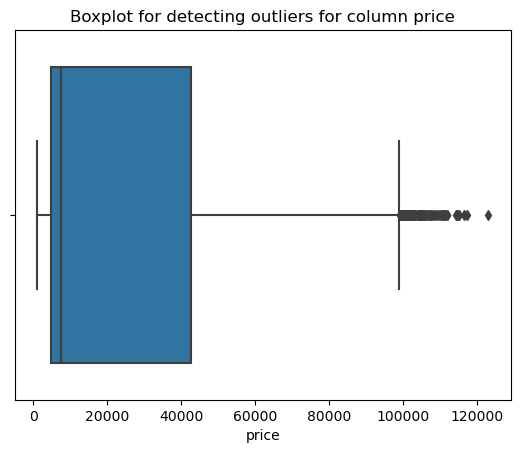

In [39]:
for col in ["duration", "days_left", "price"]:
    sns.boxplot(data= df, x= df[col])
    plt.title(f"Boxplot for detecting outliers for column {col}")
    plt.xlabel(f"{col}")
    plt.show();

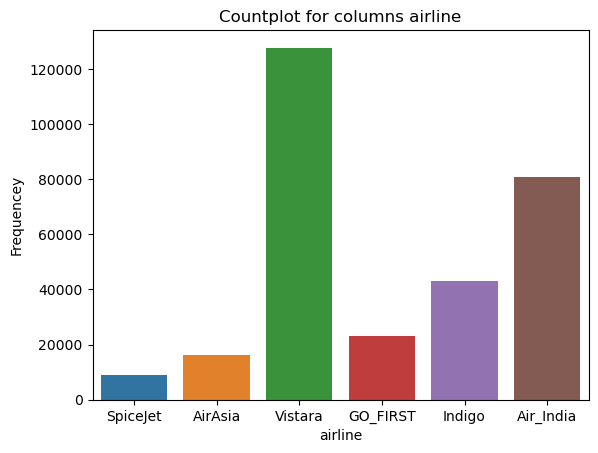

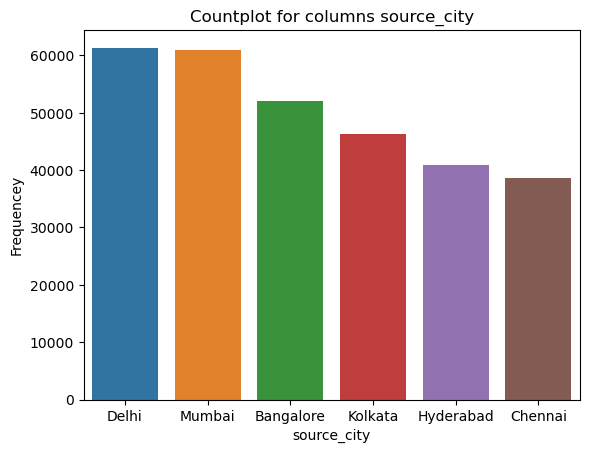

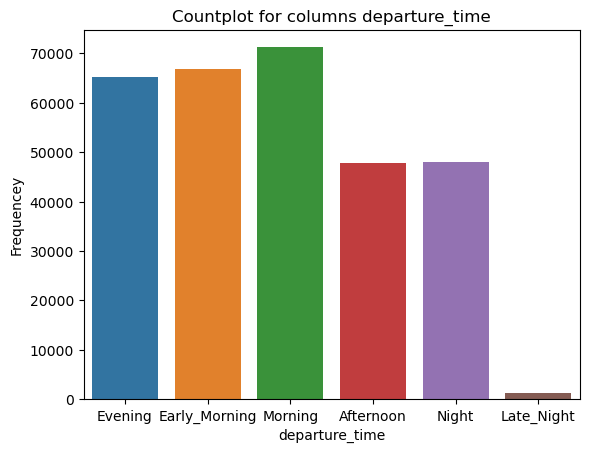

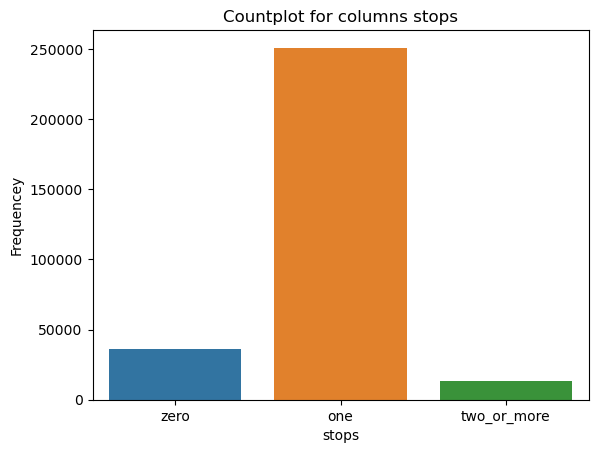

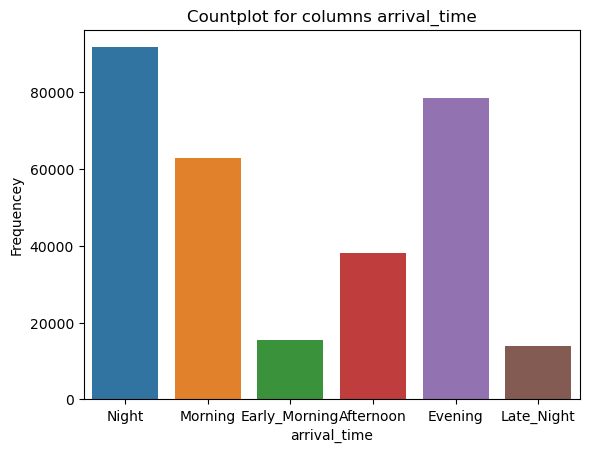

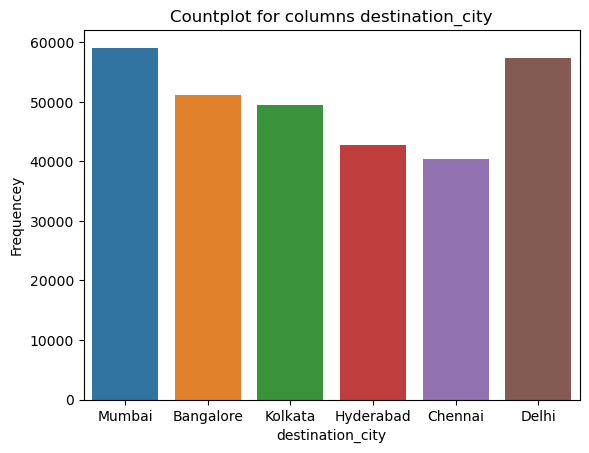

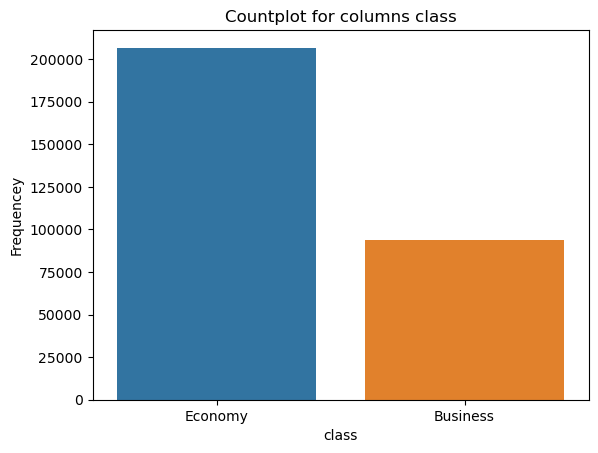

In [40]:
for col in df.select_dtypes("object"):
    if col != "flight":
        sns.countplot(data= df, x= df[col])
        plt.xlabel(f"{col}")
        plt.ylabel("Frequencey")
        plt.title(f"Countplot for columns {col}")
        plt.show();

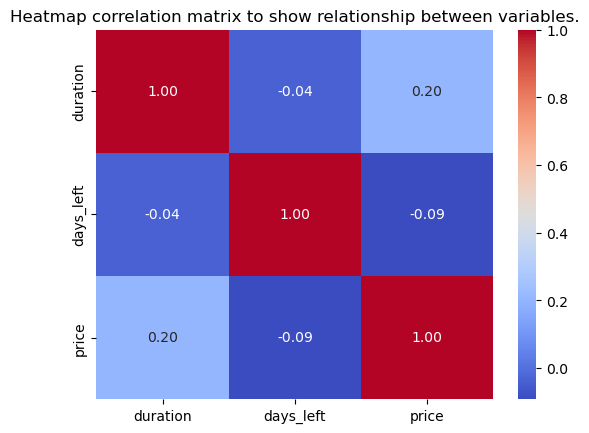

In [41]:
numeric_fearures = df.select_dtypes(include= ["int64", "float64"])
corr = numeric_fearures.corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Heatmap correlation matrix to show relationship between variables.")
plt.show();

In [42]:
def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]

In [43]:
df = handle_outliers("duration")
df = handle_outliers("price")

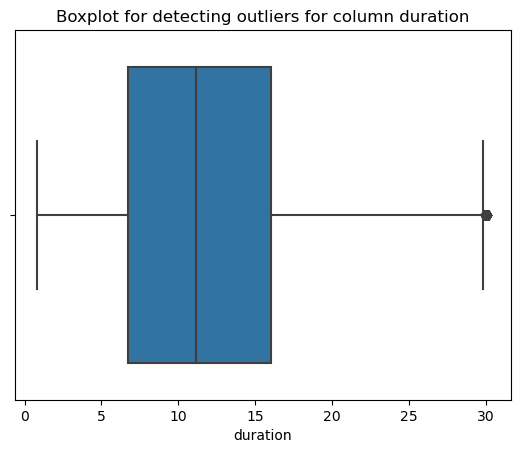

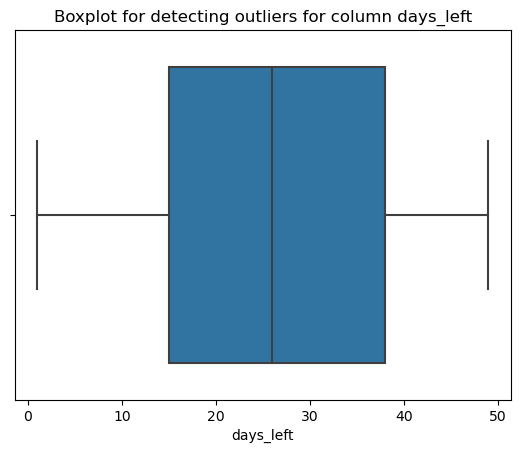

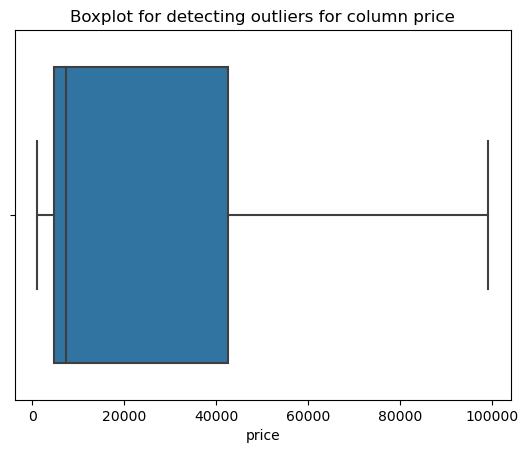

In [44]:
for col in ["duration", "days_left", "price"]:
    sns.boxplot(data= df, x= df[col])
    plt.title(f"Boxplot for detecting outliers for column {col}")
    plt.xlabel(f"{col}")
    plt.show();

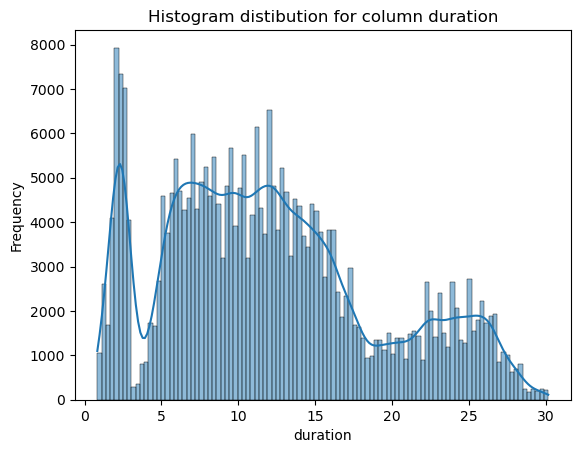

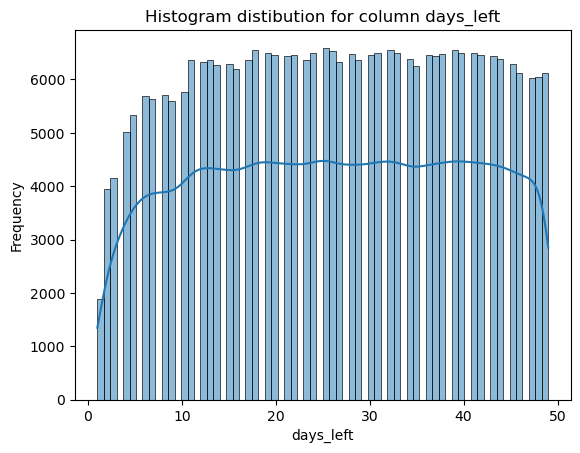

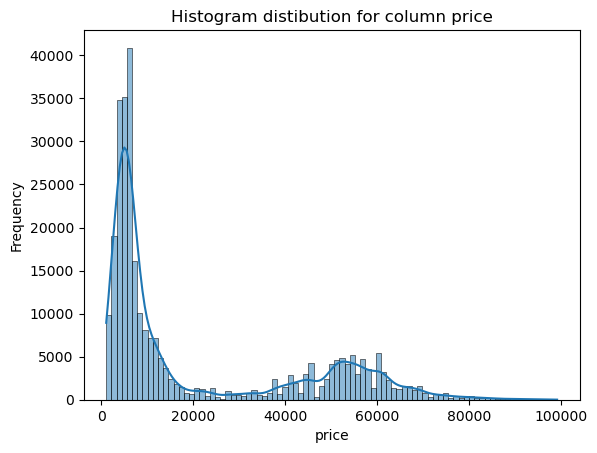

In [45]:
for col in ["duration", "days_left", "price"]:
    sns.histplot(data= df, x= df[col], kde= True)
    plt.title(f"Histogram distibution for column {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show();

In [46]:
df["log_price"] = np.log(df["price"])

In [47]:
ord_enc = OrdinalEncoder()
df["stops_encoded"] = ord_enc.fit_transform(df[['stops']])
df["departure_time_encoded"] = ord_enc.fit_transform(df[["departure_time"]])
df["arriavl_time_encoded"] = ord_enc.fit_transform(df[["arrival_time"]])
df["class_encoded"] = ord_enc.fit_transform(df[["class"]])

In [48]:
df = pd.get_dummies(df, columns= ["airline", "source_city", "destination_city"], drop_first= True)
df.head()

,flight,departure_time,stops,arrival_time,class,duration,days_left,price,log_price,stops_encoded,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SG-8709,Evening,zero,Night,Economy,2.17,1,5953,8.691651,2.0,...,0,1,0,0,0,0,0,0,0,1
1,SG-8157,Early_Morning,zero,Morning,Economy,2.33,1,5953,8.691651,2.0,...,0,1,0,0,0,0,0,0,0,1
2,I5-764,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,8.692154,2.0,...,0,1,0,0,0,0,0,0,0,1
3,UK-995,Morning,zero,Afternoon,Economy,2.25,1,5955,8.691986,2.0,...,0,1,0,0,0,0,0,0,0,1
4,UK-963,Morning,zero,Morning,Economy,2.33,1,5955,8.691986,2.0,...,0,1,0,0,0,0,0,0,0,1


In [49]:
df = df.drop(columns= ["flight", "price", "stops", "departure_time", "arrival_time", "class"])
df.head()

,duration,days_left,log_price,stops_encoded,departure_time_encoded,arriavl_time_encoded,class_encoded,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2.17,1,8.691651,2.0,2.0,5.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2.33,1,8.691651,2.0,1.0,4.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2.17,1,8.692154,2.0,1.0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2.25,1,8.691986,2.0,4.0,0.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.33,1,8.691986,2.0,4.0,4.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [50]:
X = df.drop("log_price", axis= 1)
y = df["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [51]:
min_max = MinMaxScaler()
cols = ["duration", "days_left"]
X_train[cols] = min_max.fit_transform(X_train[cols])
X_test[cols] = min_max.transform(X_test[cols])

In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

In [53]:
mean_absolute_train = mean_absolute_error(y_train, y_pred_train)
mean_absolute_test = mean_absolute_error(y_test, y_pred)
print(mean_absolute_train)
print(mean_absolute_test)

0.26461885646269123
0.2645399512142344


In [54]:
mean_square_train = mean_squared_error(y_train, y_pred_train)
mean_square_test = mean_squared_error(y_test, y_pred)
print(mean_square_train)
print(mean_square_test)

0.11335746089680078
0.11334937458898968


In [55]:
root_mean_square_train = np.sqrt(mean_square_train)
root_mean_square_test = np.sqrt(mean_square_test)
print(root_mean_square_train)
print(root_mean_square_test)

0.3366859974765817
0.3366739885838965


In [56]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
print(r2_train)
print(r2_test)

0.9086778127229473
0.9090375386234874


In [57]:
with open("C:\\Users\\lenovo\\OneDrive\\Desktop\\Machine Learning Flight Price Prediction\\linear_regression_model.pkl", "wb") as f:
    pickle.dump(linreg, f)

In [58]:
with open("C:\\Users\\lenovo\\OneDrive\\Desktop\\Machine Learning Flight Price Prediction\\linear_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [59]:
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded[:5]

array([ 8.85146725,  8.69082724, 10.98669142,  8.52408643, 10.71579044])